In [12]:

# installs
!pip install textblob
!pip install wordcloud
!python -m textblob.download_corpora
!pip install plotly
!pip install wordninja
!pip install pyspellchecker




#importing

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import plotly.express as px


[nltk_data] Downloading package brown to
[nltk_data]     /Users/krishnachaitanyarao/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/krishnachaitanyarao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/krishnachaitanyarao/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/krishnachaitanyarao/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/krishnachaitanyarao/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/krishnachaitanyarao/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [13]:
df = pd.read_csv("vaccination_all_tweets.csv", quotechar='"', delimiter=',').dropna()
df


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False
10,1337841934170255365,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False
15,1337789467038523394,City A.M.,"London, England","London's business newspaper - News, Opinion, a...",2009-06-09 13:53:06,66224,603,771,True,2020-12-12 16:00:38,Trump announces #vaccine rollout 'in less than...,['vaccine'],Twitter for iPhone,0,1,False
16,1337789191598575616,STOPCOMMONPASS.ORG,Global,'Trust' is not carte-blanche for erosion of ou...,2020-10-25 20:33:33,406,176,479,False,2020-12-12 15:59:32,UPDATED: #YellowFever &amp; #COVID19 #Immunity...,"['YellowFever', 'COVID19', 'ImmunityPassports'...",Twitter Web App,2,2,False
17,1337783770070409218,ILKHA,Türkiye,Official Twitter account of Ilke News Agency /,2015-05-22 08:31:12,4056,6,3,True,2020-12-12 15:38:00,"Coronavirus: Iran reports 8,201 new cases, 221...","['Iran', 'coronavirus', 'PfizerBioNTech']",TweetDeck,3,5,False
18,1337781178665816064,Braderz73🌹#GTTO 🇪🇺 🇬🇧,"Bristol, UK","One of those lefty types, I believe in a faire...",2012-07-24 08:18:51,6430,6292,45007,False,2020-12-12 15:27:42,.@Pfizer will rake in billions from its expens...,['CovidVaccine'],Twitter for Android,3,3,False
19,1337776763384958976,Alex Vie,"Los Angeles, CA",Marine vet. Yogi. Krav Maga. Runner. Climber. ...,2010-01-24 04:43:57,125,442,5401,False,2020-12-12 15:10:09,The trump administration failed to deliver on ...,"['COVIDIOTS', 'coronavirus', 'CovidVaccine']",Twitter for iPhone,0,0,False


In [42]:
df['text'][:10]

0                                                  Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF
2       #coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P
6        it is a bit sad to claim the fame for success of #vaccination on patriotic competition between USA, Canada, UK and… https://t.co/IfMrAyGyTP
9     #CovidVaccine \n\nStates will start getting #COVID19Vaccine Monday, #US says \n#pakustv #NYC #Healthcare #GlobalGoals… https://t.co/MksOvBvs5w
10    while deaths are closing in on the 300,000 mark... millions of people wait #PfizerBioNTech #Vaccine !\n-\nThe first U… https://t.co/uQ3A2f7SVP
15               Trump announces #vaccine rollout 'in less than 24 hours'\n\nThe first Americans will be vaccinated against… https://t.co/2FzQSMnhoY
16       UPDATED: #YellowFever &amp; #COVID19 #ImmunityPassports - Part Two\n\n#SARSCoV2 #PfizerBioNtech #

In [14]:
print(df.columns)
print(df.shape)

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')
(16180, 16)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16180 entries, 0 to 27808
Data columns (total 16 columns):
id                  16180 non-null int64
user_name           16180 non-null object
user_location       16180 non-null object
user_description    16180 non-null object
user_created        16180 non-null object
user_followers      16180 non-null int64
user_friends        16180 non-null int64
user_favourites     16180 non-null int64
user_verified       16180 non-null bool
date                16180 non-null object
text                16180 non-null object
hashtags            16180 non-null object
source              16180 non-null object
retweets            16180 non-null int64
favorites           16180 non-null int64
is_retweet          16180 non-null bool
dtypes: bool(2), int64(6), object(8)
memory usage: 1.9+ MB


In [16]:
#Data Wrangling & Preprocessing

df.drop(columns=['id'], inplace=True)

In [17]:
df = df.drop_duplicates('text')
print(df.shape)

(16170, 15)


In [18]:
# use regular expressions to strip each tweet of mentions, hashtags, retweet information, and links
def clean_tweet_text(text):
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = text.lower()
    return text

# the following line makes use of an apply function-- it will call clean_tweet_text on every element in the 'text' column
df['text'].transform(clean_tweet_text)
df.head()


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
2,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
6,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False
9,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False
10,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False


In [19]:
# we do not care about the exact time of each tweet, we just want the date
df['date'] = pd.to_datetime(df['date']).dt.date
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
2,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
6,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False
9,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False
10,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False


In [20]:
#Exploratory Data Analysis (EDA)

df.describe()

,user_followers,user_friends,user_favourites,retweets,favorites
count,1.617000e+04,16170.000000,16170.000000,16170.000000,16170.000000
mean,1.719752e+05,1518.035931,14619.516079,4.241187,18.428386
std,1.141814e+06,7640.144298,37054.083845,45.617605,246.240119
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2.180000e+02,170.000000,426.000000,0.000000,0.000000
50%,9.470000e+02,492.500000,2377.000000,0.000000,1.000000
75%,4.284000e+03,1372.750000,11847.250000,1.000000,5.000000
max,1.486666e+07,380428.000000,686342.000000,2360.000000,22815.000000


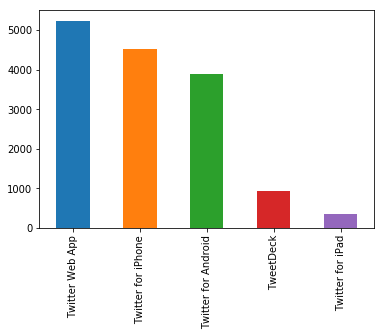

In [21]:
# which device are people tweeting about the vaccine from?
df['source'].value_counts().head(n=5).plot.bar()

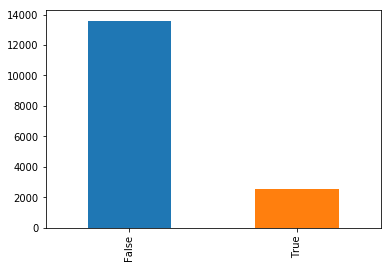

In [22]:
df['user_verified'].value_counts().head(n=10).plot.bar()

In [23]:
df[df['user_verified'] == True].head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
15,City A.M.,"London, England","London's business newspaper - News, Opinion, a...",2009-06-09 13:53:06,66224,603,771,True,2020-12-12,Trump announces #vaccine rollout 'in less than...,['vaccine'],Twitter for iPhone,0,1,False
17,ILKHA,Türkiye,Official Twitter account of Ilke News Agency /,2015-05-22 08:31:12,4056,6,3,True,2020-12-12,"Coronavirus: Iran reports 8,201 new cases, 221...","['Iran', 'coronavirus', 'PfizerBioNTech']",TweetDeck,3,5,False
22,City A.M.,"London, England","London's business newspaper - News, Opinion, a...",2009-06-09 13:53:06,66224,603,771,True,2020-12-12,Trump announces #vaccine rollout 'in less than...,['vaccine'],Buffer,1,0,False
43,City A.M.,"London, England","London's business newspaper - News, Opinion, a...",2009-06-09 13:53:06,66224,603,771,True,2020-12-12,Trump announces #vaccine rollout 'in less than...,['vaccine'],Twitter Web App,0,2,False
44,Daily News Egypt,Egypt,Egypt's Only Daily Independent Newspaper in En...,2009-04-26 07:56:24,278080,116,765,True,2020-12-12,#FDA authorizes #PfizerBioNTech #coronavirus v...,"['FDA', 'PfizerBioNTech', 'coronavirus']",Twitter Web App,1,1,False


In [24]:
# what are the top 10 most retweeted tweets
pd.set_option('display.max_colwidth', 400)
df.sort_values(by='retweets', ascending=False)[['text', 'date', 'user_name', 'user_location', 'hashtags', 'favorites', 'retweets']].head(n=10)

,text,date,user_name,user_location,hashtags,favorites,retweets
17118,"Got my jab. For the curious, it was #Covaxin. \n\nFelt secure, will travel safely. https://t.co/8PL7PZMEsf",2021-03-01,Dr. S. Jaishankar,"New Delhi, India",['Covaxin'],22815,2360
7126,"New research published in Microbiology &amp; Infectious Diseases, immunologist J. Bart Classen warns #mRNA technology u… https://t.co/OWUTf5ShHO",2021-02-10,Robert F. Kennedy Jr,"Los Angles, California",['mRNA'],3090,2247
26737,"#Covaxin 🇮🇳 , made by Hyderabad-based Bharat Biotech International Limited, has been declared ""Safe, Immunogenic wi… https://t.co/FAUOEHJmAw",2021-03-09,Megh Updates 🚨,Turn on Notification 🔔,['Covaxin'],9457,2092
17543,Prime Minister Narendra Modi choose early morning time to take #covaxin . No traffic was stopped . Traveled normall… https://t.co/udxAqk9xEC,2021-03-01,Megh Updates 🚨,Turn on Notification 🔔,['covaxin'],8153,1980
27709,This is not a queue for a Covid vaccine\nThis is a queue at a food bank today in the UK.\n#coronavirus #oxfordvaccine… https://t.co/rGqg14FT9t,2021-03-08,Afshin Rattansi,London,"['coronavirus', 'oxfordvaccine']",1713,1514
20965,#BREAKING : Bharat Biotech says its #Covaxin shows interim clinical efficacy of 81% in Phase 3 results,2021-03-03,Megh Updates 🚨,Turn on Notification 🔔,"['BREAKING', 'Covaxin']",6651,938
20575,It is tough when have to play the sauve Amrikan doctor but ur desi Lahore genes start acting up #Covaxin https://t.co/ZUygPW4WGd,2021-03-03,Manoj Rawat,New Delhi,['Covaxin'],3636,922
13101,AIIMS nurse who gave the #Covaxin jab to Prime Minister @narendramodi speaks to the national broadcaster DD News ab… https://t.co/ivPj4KGiyE,2021-03-01,Aditya Raj Kaul,"New Delhi, India",['Covaxin'],5827,870
21568,"The Opposition campaign to denigrate #Covaxin is disgraceful. So is the refusal by a coterie of senior editors, col… https://t.co/yN6M1BxvCn",2021-03-05,Minhaz Merchant,Mumbai,['Covaxin'],2311,806
20964,Phase 3 Results of #COVAXIN - announced by @BharatBiotech : Demonstrates Interim Clinical Efficacy of 81%,2021-03-03,Prof Shamika Ravi,"New Delhi, Kannauj, Kohima",['COVAXIN'],5575,773


In [25]:
df.sort_values(by=['date', 'favorites'], ascending=[True, False])[['text', 'date', 'user_name', 'user_location', 'hashtags', 'favorites', 'retweets']].head(n=10)

,text,date,user_name,user_location,hashtags,favorites,retweets
35,An immigrant Muslim couple find the COVID-19 Vaccine. \n\n#CovidVaccine #PfizerBioNTech #Pfizervaccine #PfizerProud,2020-12-12,Shahjhan Malik | #WearAMask,"Nottinghamshire, England","['CovidVaccine', 'PfizerBioNTech', 'Pfizervaccine', 'PfizerProud']",37,2
293,#UnitedStates : The Federal Aviation Administration (FAA) said Saturday it had approved the use of the… https://t.co/xvwUEvZZk2,2020-12-12,DD News,"New Delhi, India",['UnitedStates'],21,4
25,No.1 of 2 done.\n\n#ThankYouNHS @NHSuk @MHRAgovuk and #PfizerBioNTech @pfizer for making the #CovidVaccine dream poss… https://t.co/3KvJ7UP432,2020-12-12,Devan Surendran,"Nottingham, England","['ThankYouNHS', 'PfizerBioNTech', 'CovidVaccine']",10,1
17,"Coronavirus: Iran reports 8,201 new cases, 221 deaths in the last 24 hours #Iran #coronavirus #PfizerBioNTech… https://t.co/mwDNAdmb7F",2020-12-12,ILKHA,Türkiye,"['Iran', 'coronavirus', 'PfizerBioNTech']",5,3
298,#UnitedStates : The Federal Aviation Administration (FAA) said Saturday it had approved the use of the… https://t.co/Lyq594UEks,2020-12-12,DD India,"New Delhi, India",['UnitedStates'],5,0
6,"it is a bit sad to claim the fame for success of #vaccination on patriotic competition between USA, Canada, UK and… https://t.co/IfMrAyGyTP",2020-12-12,Gunther Fehlinger,"Austria, Ukraine and Kosovo",['vaccination'],4,0
301,I am beyond relieved to share that I’ll be among the first to receive the #CovidVaccine from #PfizerBioNTech. Thank… https://t.co/1py4jUhGzU,2020-12-12,"Taryn Schuelke, CT, CCLS","Houston, TX","['CovidVaccine', 'PfizerBioNTech']",4,2
18,.@Pfizer will rake in billions from its expensive #CovidVaccine but @AlbertBourla refuses to cut the price for lowe… https://t.co/eC94w3TUl0,2020-12-12,Braderz73🌹#GTTO 🇪🇺 🇬🇧,"Bristol, UK",['CovidVaccine'],3,3
16,UPDATED: #YellowFever &amp; #COVID19 #ImmunityPassports - Part Two\n\n#SARSCoV2 #PfizerBioNtech #Britain #December… https://t.co/qKT7Rst9aW,2020-12-12,STOPCOMMONPASS.ORG,Global,"['YellowFever', 'COVID19', 'ImmunityPassports', 'SARSCoV2', 'PfizerBioNtech', 'Britain', 'December']",2,2
21,Anyone wondering why day after #PfizerBioNTech approval in the UK people were getting vaccinated but all we are tol… https://t.co/tPSyL9CUYE,2020-12-12,"Richard Dunne, MD","Rochester, NY",['PfizerBioNTech'],2,0


In [27]:
#Sentiment Analysis
#We will be using the TextBlob library to perform sentiment analysis on the tweets in our dataset. TextBlob provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more. That said, there are numerous other packages with similar capabilities that are worth exploring, including sklearn, nltk, vader, allennlp, and more.

#Exp:
    
testimonial = TextBlob("So excited to get my vaccine!")
print(testimonial.sentiment)
testimonial = TextBlob("Is the vaccine painful?")
print(testimonial.sentiment)
testimonial = TextBlob("The Pfizer vaccine is now FDA approved")
print(testimonial.sentiment)

Sentiment(polarity=0.46875, subjectivity=0.75)
Sentiment(polarity=-0.7, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=0.0)


In [28]:
testimonial = TextBlob("I tested positive for COVID-19")
print(testimonial.sentiment)

Sentiment(polarity=0.22727272727272727, subjectivity=0.5454545454545454)


In [29]:
# tweet from Texas Governor Greg Abbott
text = """
Today Texas surpassed 8 million vaccinations. It was just 4 days ago that we passed 7 million.

The positivity rate dropped even lower--to 6.08%--the lowest since May 31st.

Hospitalizations went down again also.

Great job Texans!

Vaccines are always voluntary, never forced.
"""
blob = TextBlob(text)

In [30]:
print("Tags")
print(blob.tags, end="\n\n")

print("Noun Phrases")
print(blob.noun_phrases, end="\n\n")

print("Words")
print(blob.words, end="\n\n")

print("Sentences")
print(blob.sentences, end="\n\n")


Tags
[('Today', 'NN'), ('Texas', 'NNP'), ('surpassed', 'VBD'), ('8', 'CD'), ('million', 'CD'), ('vaccinations', 'NNS'), ('It', 'PRP'), ('was', 'VBD'), ('just', 'RB'), ('4', 'CD'), ('days', 'NNS'), ('ago', 'RB'), ('that', 'IN'), ('we', 'PRP'), ('passed', 'VBD'), ('7', 'CD'), ('million', 'CD'), ('The', 'DT'), ('positivity', 'NN'), ('rate', 'NN'), ('dropped', 'VBD'), ('even', 'RB'), ('lower', 'JJR'), ('to', 'TO'), ('6.08', 'CD'), ('%', 'NN'), ('the', 'DT'), ('lowest', 'JJS'), ('since', 'IN'), ('May', 'NNP'), ('31st', 'CD'), ('Hospitalizations', 'NNS'), ('went', 'VBD'), ('down', 'RB'), ('again', 'RB'), ('also', 'RB'), ('Great', 'NNP'), ('job', 'NN'), ('Texans', 'NNPS'), ('Vaccines', 'NNS'), ('are', 'VBP'), ('always', 'RB'), ('voluntary', 'JJ'), ('never', 'RB'), ('forced', 'VBN')]

Noun Phrases
['texas', 'positivity rate', 'may', 'hospitalizations', 'great job', 'vaccines']

Words
['Today', 'Texas', 'surpassed', '8', 'million', 'vaccinations', 'It', 'was', 'just', '4', 'days', 'ago', 'that'

In [31]:
for sentence in blob.sentences:
    print(sentence)
    print("polarity:", sentence.sentiment.polarity)
    print("subjectivity:", sentence.sentiment.subjectivity)
    print()


Today Texas surpassed 8 million vaccinations.
polarity: 0.0
subjectivity: 0.0

It was just 4 days ago that we passed 7 million.
polarity: 0.0
subjectivity: 0.0

The positivity rate dropped even lower--to 6.08%--the lowest since May 31st.
polarity: 0.0
subjectivity: 0.0

Hospitalizations went down again also.
polarity: -0.15555555555555559
subjectivity: 0.2888888888888889

Great job Texans!
polarity: 1.0
subjectivity: 0.75

Vaccines are always voluntary, never forced.
polarity: 0.15000000000000002
subjectivity: 0.2



In [44]:
# tweet from Krishna Chaitanya 
newtext = """
I have seen around 1000 people vaccinated in karimnagar, India.

The cases were rapidly increased in hyderabad since jan 2021.

Reduced total number of usage of sanitizers 

Good job government and research team.

"""
blob = TextBlob(newtext)

print("Tags")
print(blob.tags, end="\n\n")

print("Noun Phrases")
print(blob.noun_phrases, end="\n\n")

print("Words")
print(blob.words, end="\n\n")

print("Sentences")
print(blob.sentences, end="\n\n")

for sentence in blob.sentences:
    print(sentence)
    print("polarity:", sentence.sentiment.polarity)
    print("subjectivity:", sentence.sentiment.subjectivity)
    print()

Tags
[('I', 'PRP'), ('have', 'VBP'), ('seen', 'VBN'), ('around', 'IN'), ('1000', 'CD'), ('people', 'NNS'), ('vaccinated', 'VBN'), ('in', 'IN'), ('karimnagar', 'NN'), ('India', 'NNP'), ('The', 'DT'), ('cases', 'NNS'), ('were', 'VBD'), ('rapidly', 'RB'), ('increased', 'VBN'), ('in', 'IN'), ('hyderabad', 'NN'), ('since', 'IN'), ('jan', 'NN'), ('2021', 'CD'), ('Reduced', 'VBN'), ('total', 'JJ'), ('number', 'NN'), ('of', 'IN'), ('usage', 'NN'), ('of', 'IN'), ('sanitizers', 'NNS'), ('Good', 'JJ'), ('job', 'NN'), ('government', 'NN'), ('and', 'CC'), ('research', 'NN'), ('team', 'NN')]

Noun Phrases
['india', 'reduced', 'total number', 'good job government', 'research team']

Words
['I', 'have', 'seen', 'around', '1000', 'people', 'vaccinated', 'in', 'karimnagar', 'India', 'The', 'cases', 'were', 'rapidly', 'increased', 'in', 'hyderabad', 'since', 'jan', '2021', 'Reduced', 'total', 'number', 'of', 'usage', 'of', 'sanitizers', 'Good', 'job', 'government', 'and', 'research', 'team']

Sentences
[

In [32]:
# let's apply the TextBlob API onto our tweet data to perform sentiment analysis!
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df.head()


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,polarity,subjectivity
0,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,['PfizerBioNTech'],Twitter for Android,0,0,False,0.00,0.125000
2,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False,0.00,0.033333
6,Gunther Fehlinger,"Austria, Ukraine and Kosovo","End North Stream 2 now - the pipeline of corruption, funding Russias war against Ukraine,Georgia, Syria and political intervention in USA and EU must be stopped",2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12,"it is a bit sad to claim the fame for success of #vaccination on patriotic competition between USA, Canada, UK and… https://t.co/IfMrAyGyTP",['vaccination'],Twitter Web App,0,4,False,-0.10,0.500000
9,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafianspower1\n#PoliticalScience #InternationalAffairs \n#PAKUSTV #Newyork #Islamabad,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12,"#CovidVaccine \n\nStates will start getting #COVID19Vaccine Monday, #US says \n#pakustv #NYC #Healthcare #GlobalGoals… https://t.co/MksOvBvs5w","['CovidVaccine', 'COVID19Vaccine', 'US', 'pakustv', 'NYC', 'Healthcare', 'GlobalGoals']",Twitter Web App,0,0,False,0.00,0.000000
10,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (freelance) for some companies that need analysis for their products in Int. Markets \n- Instagram : tamervisits -",2009-09-17 16:45:16,1302,78,339,False,2020-12-12,"while deaths are closing in on the 300,000 mark... millions of people wait #PfizerBioNTech #Vaccine !\n-\nThe first U… https://t.co/uQ3A2f7SVP","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False,0.25,0.333333


FileNotFoundError: [Errno 2] No such file or directory: './figures/polarity_hist.png'

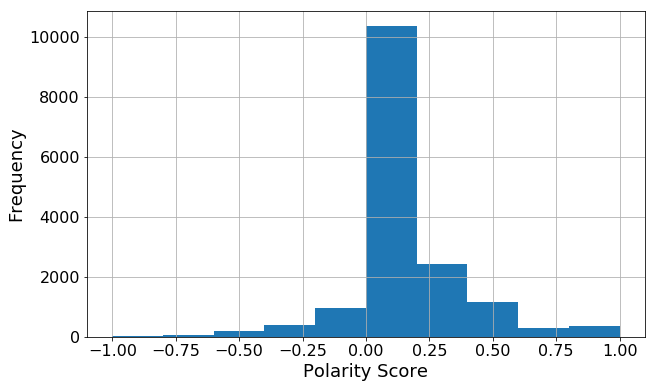

In [33]:
fig = plt.figure(figsize=(10, 6))
df['polarity'].hist()
plt.xlabel('Polarity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.savefig("./figures/polarity_hist.png")

FileNotFoundError: [Errno 2] No such file or directory: './figures/subjectivity_hist.png'

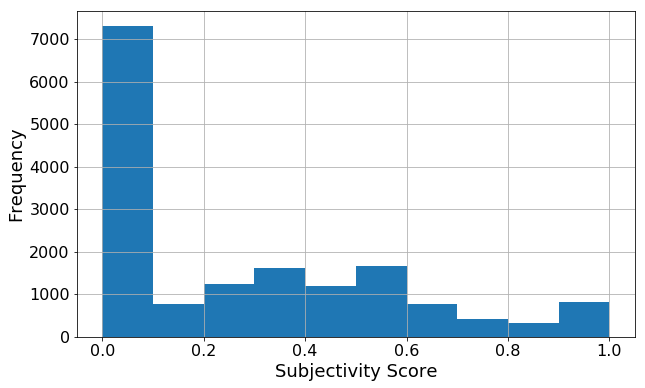

In [34]:
fig = plt.figure(figsize=(10, 6))
df['subjectivity'].hist()
plt.xlabel('Subjectivity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.savefig("./figures/subjectivity_hist.png")

In [35]:
#Inspection

# inspect the most negatively charged tweets
df.sort_values(by='polarity', ascending=True)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

,text,polarity,subjectivity
0,@AblemanAdam Terrible! Thank-you! And here in Canada @JustinTrudeau still will not call Russia for some #SputnikV,-1.0,1.0
1,Pharmaceutical greed at its worst...\n\n#PfizerBioNTech \n\nhttps://t.co/nT98jdzMlj,-1.0,1.0
2,"Day 4 w/#Moderna (shot 1)..\nugh, i'm miserable, but ironically i have never had any injection site pain or swelling… https://t.co/H8jo9i4wl8",-1.0,1.0
3,#Moderna side effects were terrible head aches and sore arm/injection site. The head aches may have been bc I was i… https://t.co/AWnTJP3LZB,-1.0,1.0
4,Outrageous that #Moderna #vaccine not approved in #Japan weeks ago. This isn’t the fault of #Moderna or the #EU or… https://t.co/UI0RtbMkJW,-1.0,1.0
5,Death of 23 people's in #Norway after receiving #PfizerBioNTech vaccine is pathetic and scarry too!! Autopsy report… https://t.co/N36GJTVDPP,-1.0,1.0
6,@ShamikaRavi @BharatBiotech Shocking #clinicaltrials of COVAXIN #COVID19Vaccine. Signs of #Covaxin recipients taken… https://t.co/kWLuW6tz0i,-1.0,1.0
7,@gurpreetscheema @Milan_reports @BharatBiotech @IndiaToday Shocking #clinicaltrials of COVAXIN #COVID19Vaccine. Sig… https://t.co/1Baj3QqeRk,-1.0,1.0
8,#PfizerBioNTech #Vaccin #COVID19 #Moderna \nWHAT THE FUCK !!!!!!\n😂😂😂😂🤣🤣🤣🤣🤣😱😱😱😱😱 https://t.co/NaPnpvhY5W,-1.0,0.6
9,Got my #Moderna Covid-19 vaccine dose 2 yesterday and today I feel like crap! 🤕 I do feel blessed to have had the o… https://t.co/8WfXUodIJJ,-1.0,0.8


In [36]:
# inspect the most positively charged tweets
df.sort_values(by='polarity', ascending=False)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

,text,polarity,subjectivity
0,Help us win this battle - Register to get yours ! #covid19 #PfizerBioNTech #HDF https://t.co/rVbjIfQvIX,1.0,0.40
1,Questions in 🇧🇦 on whether the authorities agreed on the best conditions when buying #SputnikV🇷🇺 vaccines continue.… https://t.co/74RsA9KxwM,1.0,0.30
2,This would be great news!\n#COVID19 #vaccines #Pfizer #Moderna https://t.co/s8QCK50Pbp,1.0,0.75
3,"He took #COVAXIN, against which a lot of misinformation was spread even when it was scientifically perfect. I think… https://t.co/0RyKiFMK6l",1.0,1.00
4,Great!\n#Covaxin \n#COVID19 https://t.co/KTVPEYTHFR,1.0,0.75
5,@ARanganathan72 Excellent work #Bharat 👏\n#Covaxin \n\nCan we help our forever skeptics &amp; critics as… https://t.co/ppBYyIWKeK,1.0,1.00
6,#Covid19 Excellent news 👏👏👏\nCongratulations @BharatBiotech\n\nExpert panel recommends dropping ‘clinical trial mode’… https://t.co/eqjhQUe0Px,1.0,1.00
7,"I'm thoroughly impressed by PM @narendramodi's commitment. He took the #COVAXIN shot by #BharatBiotech, leading by… https://t.co/eQUlWc92Wb",1.0,1.00
8,Very happy to have been given the 1st dose of the #PfizerBioNTech #CovidVaccine today at @NewcastleHosps RVI. Amazi… https://t.co/SkMCQzlZZA,1.0,1.00
9,"Just got vaccinated, and feel great about it! #moderna dose 1 https://t.co/RhkBKukPfz",1.0,0.75


In [37]:
# inspect the most subjective tweets (NOTE: subjectivity scale ranges from 0 to 1)
df.sort_values(by='subjectivity', ascending=True)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

,text,polarity,subjectivity
0,"2nd vaccine received today, thank you @OUHospitals #PfizerBioNTech #covid19 #OneTeamOneOUH #NurseTwitter https://t.co/OoTZpQCQq8",0.0,0.0
1,"article #compares #benefits of #Pfizer, #Moderna and #Johnson and Johnson #vaccines https://t.co/FaNr6YgI2W",0.0,0.0
2,#Thursday “Ok. I was watching @12News it says the “#johnsonandjohnson #COVID19Vaccine is a one shot vaccine. Howeve… https://t.co/nx1HoyM8GL,0.0,0.0
3,Hey #Chicago..\n\nHeads up ! #COVID19 vaccine.\n\n#Moderna https://t.co/0O8Wmo92Ac,0.0,0.0
4,"For everyone passing on the #Moderna and #Pfizer vaccines to wait for the #johnsonandjohnson vaccine, please rememb… https://t.co/ChLtt6XWOv",0.0,0.0
5,The complexities of international politics hit #publichealth and #humanrights once again: \n\nSurplus #doses of… https://t.co/nxIXuDzWWb,0.0,0.0
6,$MRNA 🇺🇸 #Moderna expects $18.4 billion in 2021 sales https://t.co/ToP0BXS1bh,0.0,0.0
7,@CDCgov is lower back pain a side effect of the @moderna_tx COVID vaccine cause...\n\nOw #COVID19Vaccine #Moderna,0.0,0.0
8,Also I got second dose #COVIDVaccine today #modernavaccine #Moderna,0.0,0.0
9,Jean Marie will #Moderna-ize me https://t.co/4wfFqOmv28,0.0,0.0


In [38]:
# inspect the most objective tweets
df.sort_values(by='subjectivity', ascending=False)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

,text,polarity,subjectivity
0,@Pfizer_France Here's manufacture @Pfizer_France #PfizerBioNTech ! @SanofiFR changes : 3 months to make it ! We don… https://t.co/lDNPYF5wyw,0.625,1.0
1,@KyleClark @nexton9news Important #COVID19 #vaccine question: Can someone who already received #Pfizer or #Moderna… https://t.co/MFJY5TxVsf,0.400,1.0
2,Covid: India could play an important role in producing vaccines https://t.co/RYZ9dyOXJY\n\n@Ocugen #BharatBiotech… https://t.co/vDTCpJJveH,0.400,1.0
3,Covid-19 Vaccine: Only 1 in 10 Take Jab After Four Weeks\n\n#vaccine #COVID19 #coronavirus #CoronaVaccine #India… https://t.co/K1YpYKcxJ5,0.000,1.0
4,Quote for today\nSayin' it as it is!\n#DollyParton #inspirational #Acceptance #nolimits #Moderna #jobsearcg #GoForIt… https://t.co/Gp8sSuGqVc,0.500,1.0
5,Finally got my vaccine today it hurt like a bitch and she even drew blood 😢 😝 #COVIDVaccination #oxfordastrazeneca 💉,0.000,1.0
6,"#SputnikV in India is &gt; 10 and in #Pakistan, only the businessman friend of #ImranKhan knows. https://t.co/zBTskSQ4uN",0.000,1.0
7,Never have I seen a group of people so happy in a pharmacy before or people so happy to get shots. #CovidVaccine… https://t.co/Rx7mHzGSUs,0.800,1.0
8,"@CBCNews Mayor of Nice in France asks health authorities to permit him to buy Russia #COVID19 vaccine #SputnikV, Wh… https://t.co/GZw9G5fhnN",0.600,1.0
9,I got the shot! #Moderna Relieved and happy to finally see the end for all of us 🙏 https://t.co/DTQFrAJwxH,0.400,1.0
